<a href="https://colab.research.google.com/github/iambranzzz/F1analysis/blob/main/f1skrrt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis 1 : Pole position Drivers wins more races (2000-2024)

In [ ]:
import requests
import json
import pandas as pd
#Extracting race results from all races from 2000-2024
all_results = []
for year in range(2000, 2025):
    for round in range(1, 27):
        url = f"https://ergast.com/api/f1/{year}/{round}/results.json"
        response = requests.get(url)
        data = json.loads(response.text)
        # Extract raceName, season, and circuitId
        if data['MRData']['RaceTable']['Races']:
          race_info = data['MRData']['RaceTable']['Races'][0]
          raceName = race_info['raceName']
          season = race_info['season']
          circuitId = race_info['Circuit']['circuitId']

          results = race_info['Results']
          # Iterate through results and add raceName, season, and circuitId
          for result in results:
              result['raceName'] = raceName
              result['season'] = season
              result['circuitId'] = circuitId
          all_results.extend(results)

df_results = pd.DataFrame(all_results)

In [ ]:
#first few rows
df_results1 = df_results.copy()
df_results1.head()


,number,position,positionText,points,Driver,Constructor,grid,laps,status,Time,raceName,season,circuitId,FastestLap
0,3,1,1,10,"{'driverId': 'michael_schumacher', 'code': 'MS...","{'constructorId': 'ferrari', 'url': 'http://en...",3,58,Finished,"{'millis': '5641987', 'time': '1:34:01.987'}",Australian Grand Prix,2000,albert_park,NaN
1,4,2,2,6,"{'driverId': 'barrichello', 'code': 'BAR', 'ur...","{'constructorId': 'ferrari', 'url': 'http://en...",4,58,Finished,"{'millis': '5653402', 'time': '+11.415'}",Australian Grand Prix,2000,albert_park,NaN
2,9,3,3,4,"{'driverId': 'ralf_schumacher', 'code': 'SCH',...","{'constructorId': 'williams', 'url': 'http://e...",11,58,Finished,"{'millis': '5661996', 'time': '+20.009'}",Australian Grand Prix,2000,albert_park,NaN
3,22,4,4,3,"{'driverId': 'villeneuve', 'code': 'VIL', 'url...","{'constructorId': 'bar', 'url': 'http://en.wik...",8,58,Finished,"{'millis': '5686434', 'time': '+44.447'}",Australian Grand Prix,2000,albert_park,NaN
4,11,5,5,2,"{'driverId': 'fisichella', 'code': 'FIS', 'url...","{'constructorId': 'benetton', 'url': 'http://e...",9,58,Finished,"{'millis': '5687152', 'time': '+45.165'}",Australian Grand Prix,2000,albert_park,NaN


# Extracting columns with dictionaries

In [ ]:
# Extract driver information
df_results1[['Driver_givenName', 'Driver_familyName', 'Driver_nationality',
           'Driver_permanentNumber', 'Driver_code']] = df_results1['Driver'].apply(lambda x: pd.Series([x.get('givenName'), x.get('familyName'), x.get('nationality'), x.get('permanentNumber'), x.get('code')]))

# Extract constructor information
df_results1[['Constructor_name', 'Constructor_nationality']] = df_results1['Constructor'].apply(lambda x: pd.Series([x.get('name'), x.get('nationality')]))

# Drop original 'Driver' and 'Constructor' columns
df_results1 = df_results1.drop(['Driver', 'Constructor'], axis=1)

df_results1.head()

,number,position,positionText,points,grid,laps,status,Time,raceName,season,circuitId,FastestLap,Driver_givenName,Driver_familyName,Driver_nationality,Driver_permanentNumber,Driver_code,Constructor_name,Constructor_nationality
0,3,1,1,10,3,58,Finished,"{'millis': '5641987', 'time': '1:34:01.987'}",Australian Grand Prix,2000,albert_park,NaN,Michael,Schumacher,German,None,MSC,Ferrari,Italian
1,4,2,2,6,4,58,Finished,"{'millis': '5653402', 'time': '+11.415'}",Australian Grand Prix,2000,albert_park,NaN,Rubens,Barrichello,Brazilian,None,BAR,Ferrari,Italian
2,9,3,3,4,11,58,Finished,"{'millis': '5661996', 'time': '+20.009'}",Australian Grand Prix,2000,albert_park,NaN,Ralf,Schumacher,German,None,SCH,Williams,British
3,22,4,4,3,8,58,Finished,"{'millis': '5686434', 'time': '+44.447'}",Australian Grand Prix,2000,albert_park,NaN,Jacques,Villeneuve,Canadian,None,VIL,BAR,British
4,11,5,5,2,9,58,Finished,"{'millis': '5687152', 'time': '+45.165'}",Australian Grand Prix,2000,albert_park,NaN,Giancarlo,Fisichella,Italian,None,FIS,Benetton,Italian


In [ ]:
# Extract the 'rank', 'lap', and 'Time' information from the 'FastestLap' column
df_results1[['FastestLapRank', 'FastestLapLap', 'FastestLapTime']] = df_results1['FastestLap'].apply(
    lambda x: pd.Series([
        x.get('rank') if isinstance(x, dict) else None,
        x.get('lap') if isinstance(x, dict) else None,
        x.get('Time', {}).get('time') if isinstance(x, dict) else None
    ])
)
# Drop original fasterlap column
df_results1 = df_results1.drop('FastestLap', axis=1)

# Selecting Relevant Columns

In [ ]:
df_results1.columns

Index(['number', 'position', 'positionText', 'points', 'grid', 'laps',
       'status', 'Time', 'raceName', 'season', 'circuitId', 'Driver_givenName',
       'Driver_familyName', 'Driver_nationality', 'Driver_permanentNumber',
       'Driver_code', 'Constructor_name', 'Constructor_nationality',
       'FastestLapRank', 'FastestLapLap', 'FastestLapTime'],
      dtype='object')

In [ ]:
df_results2 = df_results1[[
    #'laps','circuitId','positionText',
  'number', 'position',  'points', 'grid', 'Driver_code',
       'status', 'Time', 'raceName', 'season',  'Driver_givenName',
       'Driver_familyName', 'Driver_nationality', 'Driver_permanentNumber',
        'Constructor_name', 'Constructor_nationality',
       'FastestLapRank', 'FastestLapLap', 'FastestLapTime'

            ]]

In [ ]:
df_results2.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,number,position,points,grid,Driver_code,status,Time,raceName,season,Driver_givenName,Driver_familyName,Driver_nationality,Driver_permanentNumber,Constructor_name,Constructor_nationality,FastestLapRank,FastestLapLap,FastestLapTime
0,3,1,10,3,MSC,Finished,"{'millis': '5641987', 'time': '1:34:01.987'}",Australian Grand Prix,2000,Michael,Schumacher,German,None,Ferrari,Italian,None,None,None
1,4,2,6,4,BAR,Finished,"{'millis': '5653402', 'time': '+11.415'}",Australian Grand Prix,2000,Rubens,Barrichello,Brazilian,None,Ferrari,Italian,None,None,None
2,9,3,4,11,SCH,Finished,"{'millis': '5661996', 'time': '+20.009'}",Australian Grand Prix,2000,Ralf,Schumacher,German,None,Williams,British,None,None,None
3,22,4,3,8,VIL,Finished,"{'millis': '5686434', 'time': '+44.447'}",Australian Grand Prix,2000,Jacques,Villeneuve,Canadian,None,BAR,British,None,None,None
4,11,5,2,9,FIS,Finished,"{'millis': '5687152', 'time': '+45.165'}",Australian Grand Prix,2000,Giancarlo,Fisichella,Italian,None,Benetton,Italian,None,None,None


# Counting Null Values

In [ ]:
# Counting null values
df_results2.isnull().sum()

,0
number,0
position,0
points,0
grid,0
Driver_code,614
status,0
Time,5331
raceName,0
season,0
Driver_givenName,0


# Hypothesis Testing

In [ ]:
df_results2['grid'] = pd.to_numeric(df_results2['grid'], errors='coerce').astype('Int64')
df_results2['position'] = pd.to_numeric(df_results2['position'], errors='coerce').astype('Int64')

<ipython-input-37-56dc60f4702a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results2['grid'] = pd.to_numeric(df_results2['grid'], errors='coerce').astype('Int64')
<ipython-input-37-56dc60f4702a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results2['position'] = pd.to_numeric(df_results2['position'], errors='coerce').astype('Int64')


In [ ]:
# Create a column for 'win' (1 = win, 0 = not win)
df_results2['win'] = df_results2['position'].apply(lambda x: 1 if x == 1 else 0)

# Group 1: Drivers starting from pole position (grid position 1)
group1 = df_results2[df_results2['grid'] == 1]['win']

# Group 2: Drivers starting from non-pole positions (grid position > 1)
group2 = df_results2[df_results2['grid'] > 1]['win']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(group1, group2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - significant difference in wins between pole and non-pole drivers.")
else:
    print("Fail to reject the null hypothesis - no significant difference in wins between pole and non-pole drivers.")


T-statistic: 54.733947655585894
P-value: 0.0
Reject the null hypothesis - significant difference in wins between pole and non-pole drivers.


<ipython-input-40-e61f502d7bc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results2['win'] = df_results2['position'].apply(lambda x: 1 if x == 1 else 0)


# Visualizations

# Heatmap of Starting Grid Positions and Finishing Positions

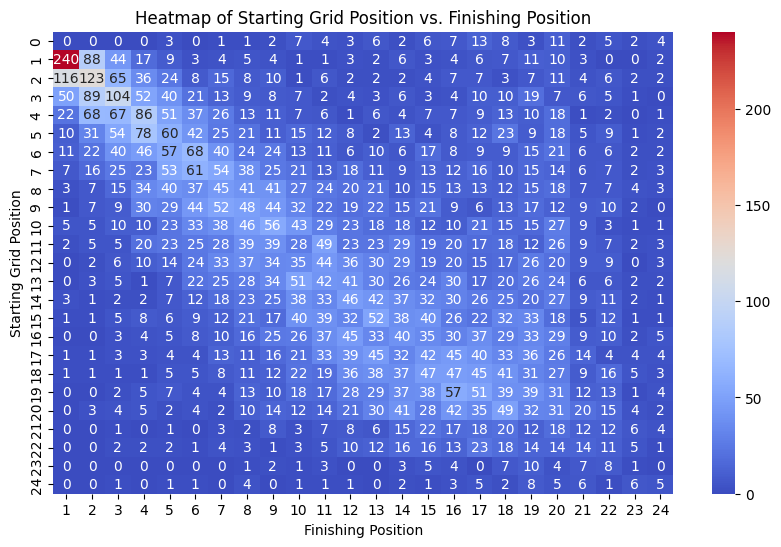

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a pivot table for grid vs position
grid_position_matrix = df_results2.pivot_table(index='grid', columns='position', aggfunc='size', fill_value=0)

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(grid_position_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=True)
plt.title('Heatmap of Starting Grid Position vs. Finishing Position')
plt.xlabel('Finishing Position')
plt.ylabel('Starting Grid Position')
plt.show()


# Scatter plot of Fastest Lap Time vs Finishing Position, by Constructor

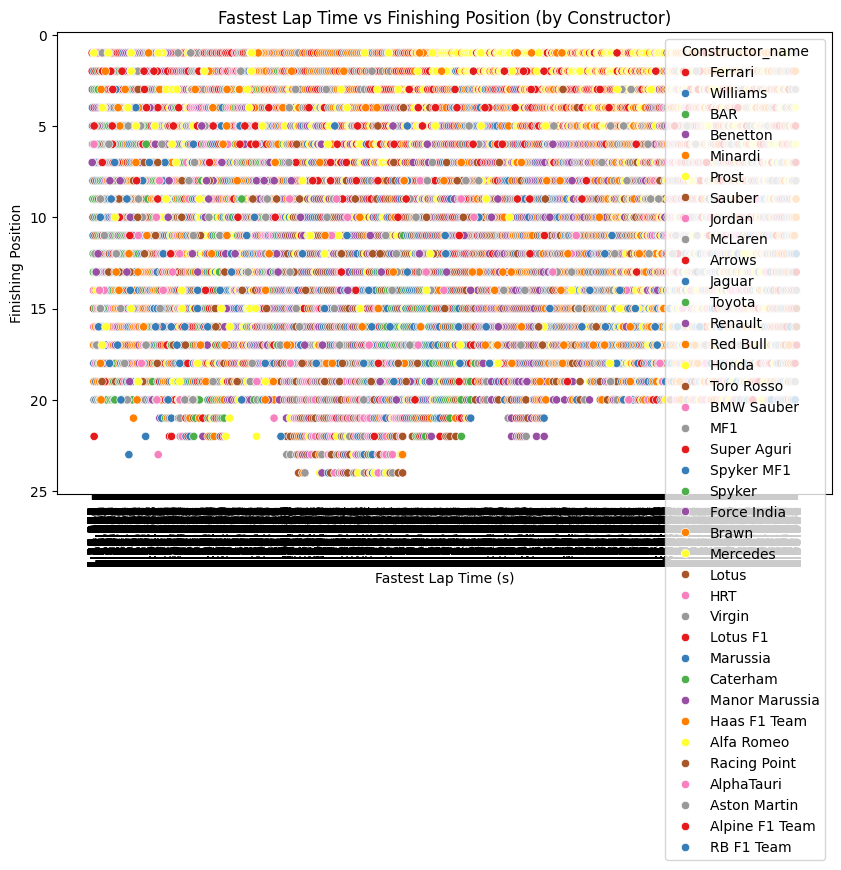

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Fastest Lap Time vs Finishing Position, colored by Constructor
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_results2, x='FastestLapTime', y='position', hue='Constructor_name', palette='Set1')

plt.title('Fastest Lap Time vs Finishing Position (by Constructor)')
plt.xlabel('Fastest Lap Time (s)')
plt.ylabel('Finishing Position')
plt.gca().invert_yaxis()  # Invert y-axis so position 1 is at the top
plt.xticks(rotation=90)
plt.show()
